<a href="https://colab.research.google.com/github/champsleague/DS_w6_phw/blob/main/DS_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import numpy as np

missing_values = ['-104.4205547','592.6244266','664.4877548','622.0486612','665.4650594','-130.9261617','1110.621115','-161.9949135','-141.8241248','0']
df = pd.read_csv('bmi_data_lab3.csv', na_values = missing_values)

print('//////////Print number of row with NAN//////////')
print(df.isna().values.sum())

print('//////////Print number of column with NAN//////////')
print(df.isna().sum())

print('//////////Extract all rows without NAN//////////')
print(df.dropna(axis=0, how='any'))

print('//////////Fill NAN with mean//////////')
print(df.fillna(df.mean()))
print(df['Weight (Pounds)'].mean())

print('//////////Fill NAN with median//////////')
print(df.fillna(df.median()))

print('//////////Fill NAN using ffill//////////')
print(df.fillna(axis=0, method='ffill'))

print('//////////Fill NAN using bfill//////////')
print(df.fillna(axis=0, method='bfill'))


//////////Print number of row with NAN//////////
21
//////////Print number of column with NAN//////////
Sex                 0
Age                 0
Height (Inches)    12
Weight (Pounds)     4
BMI                 5
dtype: int64
//////////Extract all rows without NAN//////////
        Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0    Female   21         65.78331         112.9925  2.0
2    Female   27         69.39874         153.0269  3.0
3      Male   24         68.21660         142.3354  3.0
4    Female   18         67.78781         144.2971  3.0
5    Female   22         68.69784         123.3024  2.0
..      ...  ...              ...              ...  ...
144    Male   22         65.18417         107.1564  2.0
145  Female   20         68.26209         116.4588  2.0
146  Female   28         68.56865         133.8402  3.0
148    Male   19         68.71053         130.7568  3.0
149    Male   25         68.89148         137.7571  3.0

[132 rows x 5 columns]
//////////Fill NAN with mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [ ]:
from google.colab import files
myfile = files.upload()

Saving bmi_data_lab3.csv to bmi_data_lab3.csv


              Age  Height (Inches)  Weight (Pounds)         BMI
count  150.000000       146.000000       150.000000  145.000000
mean    26.413333        80.133994       129.703405    2.751724
std      5.206071        96.579662        88.179891    0.449244
min     18.000000      -130.926162      -161.994913    1.000000
25%     22.000000        66.599598       120.391125    3.000000
50%     26.500000        68.219095       128.538050    3.000000
75%     31.000000        69.432848       136.170900    3.000000
max     35.000000       665.465059      1110.621115    3.000000 

['Sex' 'Age' 'Height (Inches)' 'Weight (Pounds)' 'BMI'] 

Sex                 object
Age                  int64
Height (Inches)    float64
Weight (Pounds)    float64
BMI                float64
dtype: object 



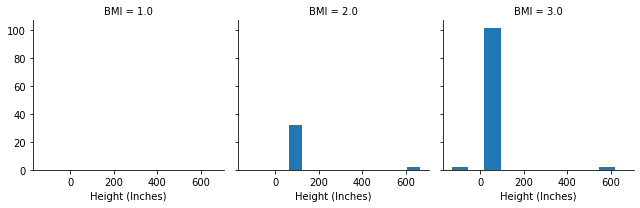

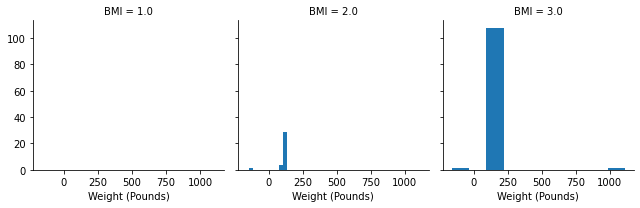

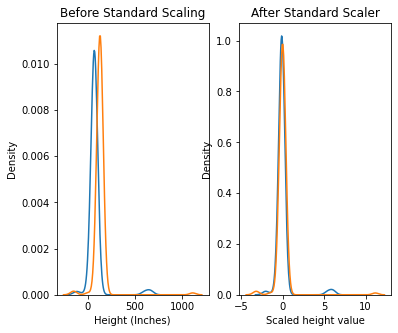

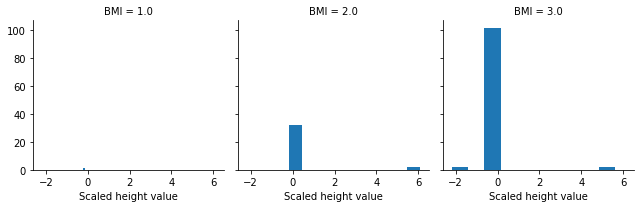

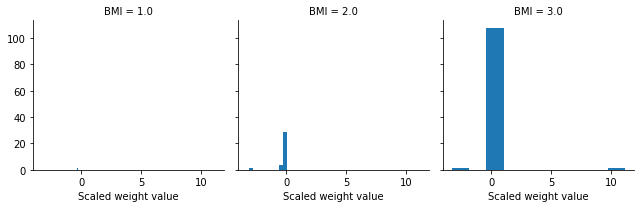

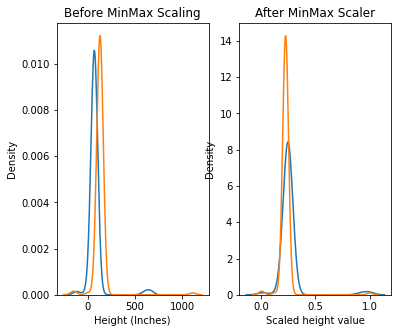

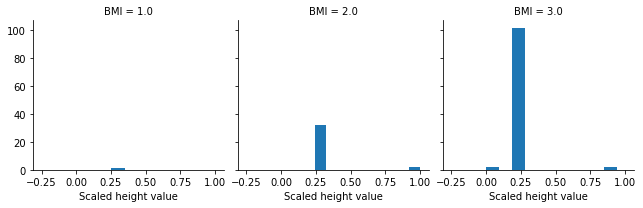

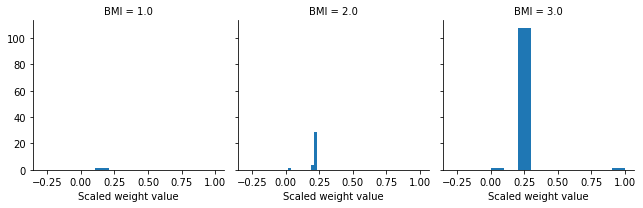

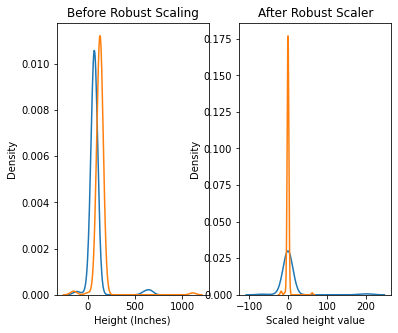

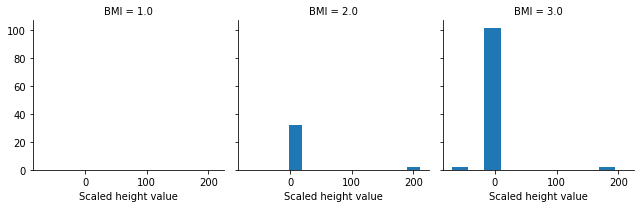

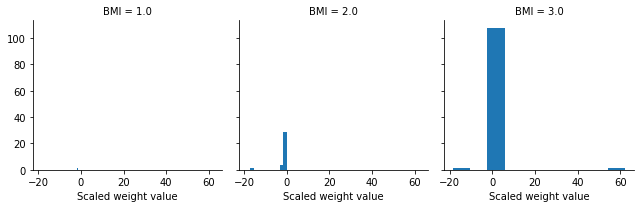

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('bmi_data_lab3.csv')
print(df.describe(),'\n')

print(df.columns.values, '\n')
print(df.dtypes,'\n')

df.replace(['-104.4205547','592.6244266','664.4877548','622.0486612','665.4650594','-130.9261617','1110.621115','-161.9949135','-141.8241248','0'],np.NAN,inplace=True)

g1 = sns.FacetGrid(df, col='BMI')
g1.map(plt.hist, 'Height (Inches)', bins=10)

g2 = sns.FacetGrid(df, col='BMI')
g2.map(plt.hist, 'Weight (Pounds)', bins=10)
plt.show()

# plot result using StandardScaler
stdScaler=preprocessing.StandardScaler()
stdScaled_df=stdScaler.fit_transform(df.iloc[:,1:4])
stdScaled_df=pd.DataFrame(stdScaled_df,columns=['Age', 'Scaled height value', 'Scaled weight value'])
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title('Before Standard Scaling')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(stdScaled_df['Scaled height value'], ax=ax2)
sns.kdeplot(stdScaled_df['Scaled weight value'], ax=ax2)

#Histogram after Standard scaling
stdScaled_df=pd.concat([stdScaled_df,df.iloc[:,-1]],axis=1)
g1_afterStd = sns.FacetGrid(stdScaled_df, col='BMI')
g1_afterStd.map(plt.hist, 'Scaled height value', bins=10)
g2_afterStd = sns.FacetGrid(stdScaled_df, col='BMI')
g2_afterStd.map(plt.hist, 'Scaled weight value', bins=10)
plt.show()

# plot result using MinMaxScaler
mmScaler = preprocessing.MinMaxScaler()
mmScaler_df = mmScaler.fit_transform(df.iloc[:,1:4])
mmScaler_df = pd.DataFrame(mmScaler_df, columns = ['Age', 'Scaled height value', 'Scaled weight value'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before MinMax Scaling')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(mmScaler_df['Scaled height value'], ax=ax2)
sns.kdeplot(mmScaler_df['Scaled weight value'], ax=ax2)

mmScaler_df=pd.concat([mmScaler_df,df.iloc[:,-1]],axis=1)
g1_afterMm = sns.FacetGrid(mmScaler_df, col='BMI')
g1_afterMm.map(plt.hist, 'Scaled height value', bins=10)
g2_afterMm = sns.FacetGrid(mmScaler_df, col='BMI')
g2_afterMm.map(plt.hist, 'Scaled weight value', bins=10)
plt.show()

# plot result using RobustScaler
robScaler = preprocessing.RobustScaler()
robScaled_df = robScaler.fit_transform(df.iloc[:,1:4])
robScaled_df = pd.DataFrame(robScaled_df, columns = ['Age', 'Scaled height value', 'Scaled weight value'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Robust Scaling')
sns.kdeplot(df['Height (Inches)'], ax=ax1)
sns.kdeplot(df['Weight (Pounds)'], ax=ax1)
ax2.set_title('After Robust Scaler')
sns.kdeplot(robScaled_df['Scaled height value'], ax=ax2)
sns.kdeplot(robScaled_df['Scaled weight value'], ax=ax2)

#Histogram after Robust scaling
robScaled_df=pd.concat([robScaled_df,df.iloc[:,-1]],axis=1)
g1_afterRob = sns.FacetGrid(robScaled_df, col='BMI')
g1_afterRob.map(plt.hist, 'Scaled height value', bins=10)
g2_afterRob = sns.FacetGrid(robScaled_df, col='BMI')
g2_afterRob.map(plt.hist, 'Scaled weight value', bins=10)
plt.show()


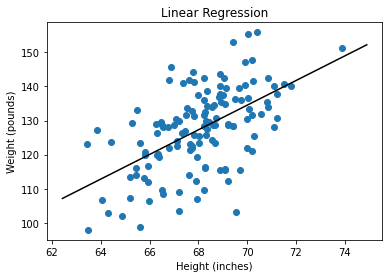

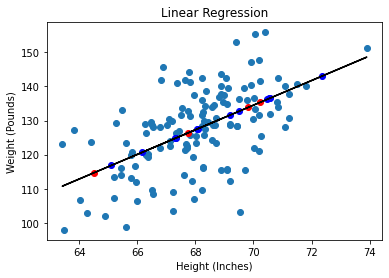

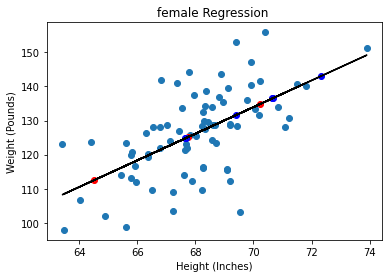

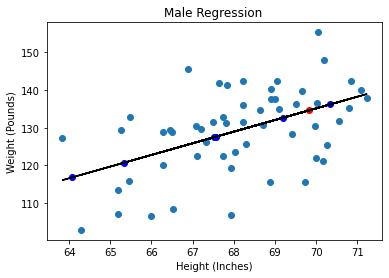

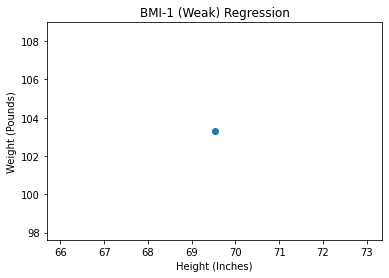

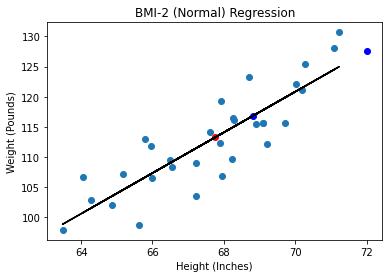

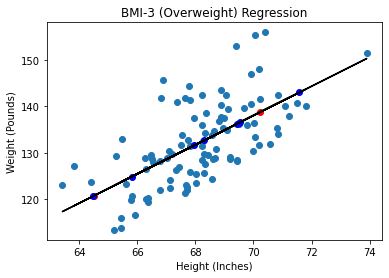

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model

missing_values = ['-104.4205547','592.6244266','664.4877548','622.0486612','665.4650594','-130.9261617','1110.621115','-161.9949135','-141.8241248','0']
df = pd.read_csv('bmi_data_lab3.csv', na_values = missing_values)

Nan_weight = df[df['Weight (Pounds)'].isna()]
Nan_height = df[df['Height (Inches)'].isna()]

df1 = df.dropna(how='any')

# Make Linear Regression
height = np.array(df1['Height (Inches)'])
weight = np.array(df1['Weight (Pounds)'])

reg = linear_model.LinearRegression()
reg.fit(height[:, np.newaxis], weight)

px = np.array([height.min() - 1, height.max() + 1])
py = reg.predict(px[:, np.newaxis])

plt.title("Linear Regression")
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')

plt.scatter(height, weight)
plt.plot(px, py, color='k')
plt.show()

# All datasets
Height = df1['Height (Inches)']
Weight = df1['Weight (Pounds)']

reg = linear_model.LinearRegression()
reg.fit(Height.values.reshape(-1, 1), Weight)
plt.scatter(Height,Weight )

#Predict weight value
predictX = Nan_weight['Height (Inches)'].values.reshape(-1, 1) 
predictY = reg.predict(predictX) 

#Predict height value
Xpd = (Nan_height['Weight (Pounds)']-reg.predict([[0]]))/reg.coef_ 
Ypd = reg.predict(Xpd.values.reshape(-1, 1)) 

plt.plot(Height,reg.predict(Height.values.reshape(-1,1)),color='black')
plt.scatter(predictX,predictY,color='r')
plt.scatter(Xpd, Ypd, color='b')
plt.title("Linear Regression")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.show()


# Female of clean datasets
female = df1[df1['Sex'] == 'Female']

# Female of missing datasets
Nan_female_x = Nan_weight[Nan_weight['Sex'] == 'Female']
Nan_female_y = Nan_height[Nan_height['Sex'] == 'Female']
female_X = female['Height (Inches)']
female_Y = female['Weight (Pounds)']

reg.fit(female_X.values.reshape(-1, 1), female_Y)
plt.scatter(female_X, female_Y)

# Predict weight value
predictX = Nan_female_x['Height (Inches)']
predictY = reg.predict(predictX.values.reshape(-1, 1)) 

# Predict height value
f_Xpd=(Nan_female_y['Weight (Pounds)']-reg.predict([[0]]))/reg.coef_
f_Ypd = reg.predict(f_Xpd.values.reshape(-1, 1)) 

plt.plot(female_X, reg.predict(female_X.values.reshape(-1,1)),color='black')
plt.scatter(predictX, predictY, color='r')
plt.scatter(f_Xpd, f_Ypd, color='b')
plt.title("female Regression ")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.show()



# Male of clean datasets
male = df1[df1['Sex'] == 'Male']

# Male of missing datasets
Nan_male_x = Nan_weight[Nan_weight['Sex'] == 'Male']
Nan_male_y = Nan_height[Nan_height['Sex'] == 'Male']
male_X = male['Height (Inches)']
male_Y = male['Weight (Pounds)']

reg.fit(male_X.values.reshape(-1, 1), male_Y)
plt.scatter(male_X, male_Y)

# Predict weight value
predictX = Nan_male_x['Height (Inches)']
predictY = reg.predict(predictX.values.reshape(-1, 1)) 

# Predict height value
m_Xpd=(Nan_male_y['Weight (Pounds)']-reg.predict([[0]]))/reg.coef_
m_Ypd = reg.predict(m_Xpd.values.reshape(-1, 1)) 

plt.plot(male_X, reg.predict(male_X.values.reshape(-1,1)),color='black')
plt.scatter(predictX, predictY, color='r')
plt.scatter(m_Xpd, m_Ypd, color='b')
plt.title("Male Regression ")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.show()



# Group by BMI-1
BMI1 = df1[df1['BMI'] == 1]

BMI1_X = BMI1['Height (Inches)']
BMI1_Y = BMI1['Weight (Pounds)']

reg.fit(BMI1_X.values.reshape(-1, 1), BMI1_Y)
plt.scatter(BMI1_X, BMI1_Y)

plt.plot(BMI1_X, reg.predict(BMI1_X.values.reshape(-1,1)), color='black')
plt.title("BMI-1 (Weak) Regression")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.show()



# Group by BMI-2
BMI2 = df1[df1['BMI'] == 2]
# BMI-2 of missing datasets
Nan_BMI2_x = Nan_weight[Nan_weight['BMI'] == 2]
Nan_BMI2_y = Nan_height[Nan_height['BMI'] == 2]

BMI2_X = BMI2['Height (Inches)']
BMI2_Y = BMI2['Weight (Pounds)']

reg.fit(BMI2_X.values.reshape(-1, 1), BMI2_Y)
plt.scatter(BMI2_X, BMI2_Y)

# Predict weight value
predictX = Nan_BMI2_x['Height (Inches)'].values.reshape(-1, 1)
predictY = reg.predict(predictX) 
# Predict height value
Xpd = (Nan_BMI2_y['Weight (Pounds)']-reg.predict([[0]]))/reg.coef_
Ypd = reg.predict(Xpd.values.reshape(-1, 1)) 

plt.plot(BMI2_X, reg.predict(BMI2_X.values.reshape(-1,1)), color='black')
plt.scatter(predictX, predictY ,color='r')
plt.scatter(Xpd, Ypd, color='b')
plt.title("BMI-2 (Normal) Regression")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.show()



# Group by BMI-3

BMI3 = df1[df1['BMI'] == 3]

# BMI-3 of missing datasets
Nan_BMI3_x = Nan_weight[Nan_weight['BMI'] == 3]
Nan_BMI3_y = Nan_height[Nan_height['BMI'] == 3]

BMI3_X = BMI3['Height (Inches)']
BMI3_Y = BMI3['Weight (Pounds)']

reg.fit(BMI3_X.values.reshape(-1, 1), BMI3_Y)
plt.scatter(BMI3_X, BMI3_Y)

#Predict weight value
predictX = Nan_BMI3_x['Height (Inches)'].values.reshape(-1, 1)
predictY = reg.predict(predictX) 

#Predict height value
Xpd = (Nan_BMI3_y['Weight (Pounds)']-reg.predict([[0]]))/reg.coef_
Ypd = reg.predict(Xpd.values.reshape(-1, 1))

plt.plot(BMI3_X, reg.predict(BMI3_X.values.reshape(-1,1)), color='black')
plt.scatter(predictX, predictY ,color='r')
plt.scatter(Xpd, Ypd, color='b')
plt.title("BMI-3 (Overweight) Regression")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.show()
